In [65]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [66]:
dir_save = ".saves/" + "error on C(nT) at large times/" 

In [67]:
ratio = 2000    #T/dt
Tvec = [1, 2, 4]
dts = np.zeros(len(Tvec))
for i in np.arange(0, len(Tvec)):
    dts[i] = Tvec[i]/ratio
dts

array([0.0005, 0.001 , 0.002 ])

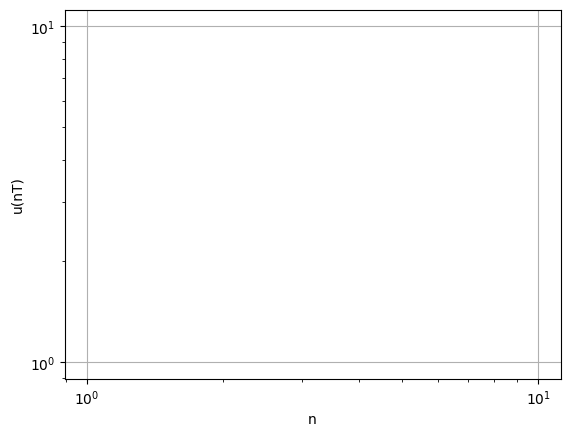

In [68]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_xlabel("n")
ax.set_ylabel("u(nT)")
ax.set_yscale("log")
ax.grid()

In [69]:
# Get all the simulations in the selected folder
for folder in os.scandir(dir_save):
    dir = folder.path
    print(dir)
    # Retrieve evolution parameters
    f = open(dir + "/tdgl_result.dat", "r")
    first_line = f.readline().strip('\n')
    N, tmax, dx, dt, seed, A, Thalf = first_line.split(" ")
    ax.set_title("N = " + str(N) + "; dx = " + str(dx) + "\n tspan = " + str(tmax)  + "\n $C(t)=A\sin(2\pi t/T)$\n A = " + str(A))
    # Get <u(nT)> (SPACE average at times t=nT)
    f = open(dir + "/fileAveout.dat", "r")
    i = 0
    n = 1
    laststep = 100000   # Must be bigger than than the number of lines of .dat file of the state

    T = 2*float(Thalf)   # Period of C(t)

    tt = np.zeros(laststep)
    uu = np.zeros(laststep)
    nn = np.zeros(laststep)
    for row in f:
        x, y = row.split(" ")
        # Select only times t = nT where T is the period
        if float(x) >= n*T:
            tt[i] = float(x)
            uu[i] = float(y)
            nn[i] = tt[i]/T
            i = i + 1
            n = n + 1
            print(tt[i-1]/T)    # It must be 1,2,3,...
    ax.plot(nn[0:i],uu[0:i],label="dt = " + str(dt) + "; T = " + str(T))  # We remove 1/u0^2 to have a power law behaviour from t=0 (otherwise it gets so only when the power law gets more important than the added)
    ax.legend()

error on C(nT) at large times/1707867130455
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
17

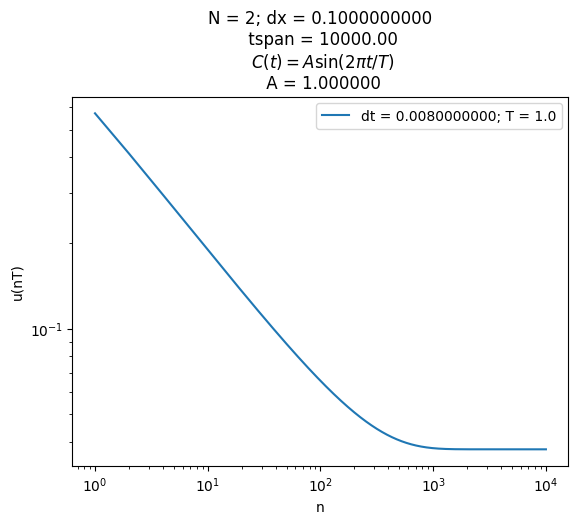

In [70]:
# Add correct curve and Asymptotic curves
# We use the Empirical fact I_0(T) = 2.28T for C(t) sine and 16.844T for cosine

u0 = 10         #CHANGE HERE!!!
uu = np.zeros(i) 
uu_asymp = np.zeros(i)   
nn = np.arange(1,i+1)
for n in nn:
    uu[n-1] = u0/(np.sqrt(1+2*2.28*n*T*u0**2))
    uu_asymp[n-1] = 1/np.sqrt(2*2.28*T*n)

# Asymptotic
#ax.plot(nn,uu,label="Analytical",color="red")
#ax.plot(nn,uu_asymp,label="Asymptotic",color="blue")

#ax.set_xlabel("t")
#ax.set_ylabel("u(t)")
#ax.set_xscale("linear")
#ax.set_yscale("linear")
ax.legend()
ax.grid()

fig

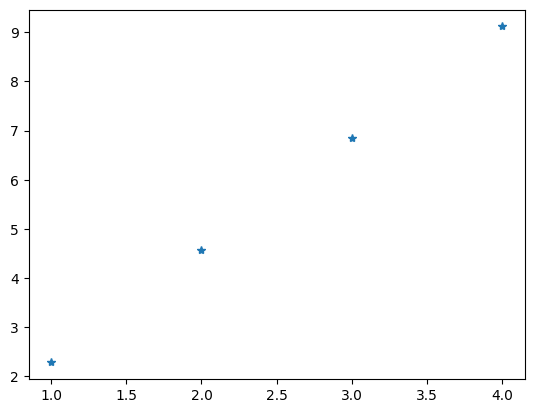

In [71]:
# Numerical integrate I_0(T) (it is linear in T)
import scipy.integrate as integrate

import scipy.special as special

Ts = [1, 2, 3, 4]
ys = np.zeros(len(Ts))
i = 0
for T in Ts:
    Ir, Im = integrate.quad(lambda x: np.exp(2*np.sin(2*np.pi*x/T)), 0, T)
    ys[i] = Ir
    i = i + 1
plt.plot(Ts,ys,'*')

In [72]:
# Long time behaviour at times t non necessarly nT
# Works only for ONE OF the simulations in the folder (so use it with only one of them)
dt = 0.001

tfinal = 5000*float(T)
stepfinal = int(tfinal/float(dt))
steps = 10000
stepinitial = stepfinal-steps

dir = dir_save + "1707832764429"    # SELECT an experiment
f = open(dir + "/fileAveout.dat", "r")
i = 0
numrows = int(5000/float(dt))
tt = np.zeros(numrows)
uu = np.zeros(numrows)
for row in f:
    if i < numrows:
        x, y = row.split(" ")
        tt[i] = float(x)
        uu[i] = float(y)
    i = i + 1

plt.plot(tt[stepinitial:stepfinal], uu[stepinitial:stepfinal])
plt.title("Behaviour of u(t) for large t! = nT" + "\ndt=" +str(dt) + " T = " + str(T))
plt.xlabel("t")
plt.ylabel("u(t)")

FileNotFoundError: [Errno 2] No such file or directory: 'error on C(nT) at large times/1707832764429/fileAveout.dat'

# Monitoring of C(nT) (it should be always zero)

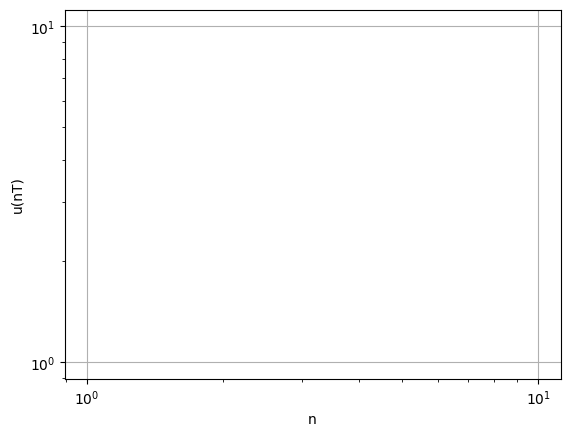

In [73]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_xlabel("n")
ax.set_ylabel("u(nT)")
ax.set_yscale("log")
ax.grid()

error on C(nT) at large times/1707867130455
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
17

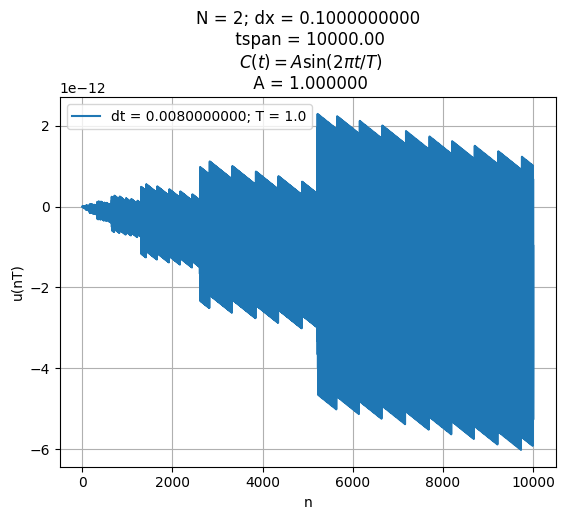

In [74]:
# Get all the simulations in the selected folder
folders = sorted(os.listdir(dir_save), reverse=False)
for folder in folders:
    dir = dir_save + folder
    print(dir)
    # Retrieve evolution parameters
    f = open(dir + "/tdgl_result.dat", "r")
    first_line = f.readline().strip('\n')
    N, tmax, dx, dt, seed, A, Thalf = first_line.split(" ")
    ax.set_title("N = " + str(N) + "; dx = " + str(dx) + "\n tspan = " + str(tmax)  + "\n $C(t)=A\sin(2\pi t/T)$\n A = " + str(A))
    # Get <u(nT)> (SPACE average at times t=nT)
    f = open(dir + "/fileCout.dat", "r")
    i = 0
    n = 1
    laststep = 100000   # Must be bigger than than the number of lines of .dat file of the state

    T = 2*float(Thalf)   # Period of C(t)

    tt = np.zeros(laststep)
    cc = np.zeros(laststep)
    nn = np.zeros(laststep)
    for row in f:
        x, y = row.split(" ")
        # Select only times t = nT where T is the period
        if float(x) >= n*T:
            tt[i] = float(x)
            cc[i] = float(y)
            nn[i] = tt[i]/T
            i = i + 1
            n = n + 1
            print(tt[i-1]/T)    # It must be 1,2,3,...
    ax.plot(nn[0:i],cc[0:i],label="dt = " + str(dt) + "; T = " + str(T))  # We remove 1/u0^2 to have a power law behaviour from t=0 (otherwise it gets so only when the power law gets more important than the added)
    ax.legend()
fig

ax.set_xscale("linear")
ax.set_yscale("linear")
fig

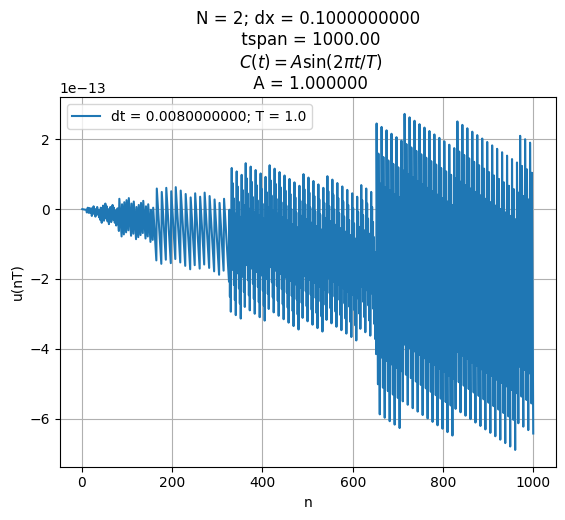

In [ ]:
ax.set_xscale("linear")
ax.set_yscale("linear")
fig